# Pressure Traverse- Revised Beggs and Brill Correlation

Importing psapy

In [32]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import BeggsandBrill.FluidProperties
import BeggsandBrill.BeegsAndBrell as BB2


Input Data

In [33]:
liquid_rate= 900
wc= .5
GLR = 700
gas_grav = 0.65
oil_grav = 35
wtr_grav = 1.07
diameter=1.922
angle=90.0
margin=20
thp= 14.7+margin
tht=120.0
twf=180.0
depth = 15000
sample_size =100
def temp_gradient(t0,t1, depth):
    if depth==0:
        return 0
    else:
        return abs(t0-t1)/depth    

t_grad = temp_gradient(tht,twf, depth)
t_grad

0.004

In [34]:
depths = np.linspace(0, depth, sample_size)

In [35]:
temps = tht + t_grad * depths

In [36]:
#def Pgrad(P, T, oil_rate, wtr_rate, Gor, gas_grav, oil_grav, wtr_grav, d, angle):

def pressure_traverse(liquid_rate,Glr=GLR):
    water_rate=liquid_rate*wc
    oil_rate=liquid_rate*(1-wc)
    gor=Glr/(1-wc)
    p=[]
    dpdz=[]
    for i in range(len(depths)-1):
        if i==0:
            p.append(thp)

        if len(dpdz)==0:
            pavg=p[0]+.2*(depths[1]-depths[0])
        else:
            pavg=p[i]+dpdz[i-1]*.5*(depths[i+1]-depths[i])

        while (True):
            dpdz_step = BB2.Pgrad(pavg, temps[i], oil_rate, water_rate, gor, gas_grav, oil_grav, wtr_grav, diameter, angle)
            if (p[i]+.5*dpdz_step*(depths[i+1]-depths[i])-pavg<.01):
                break
            else:
                pavg=p[i]+.5*dpdz_step*(depths[i+1]-depths[i])

        dpdz.append(dpdz_step)
        dz = (depths[i+1]-depths[i])
        pressure = p[i]+dz*dpdz[i-1]
        p.append(pressure)
    p[:] = [number - 14.7-margin for number in p]
    return p

p=pressure_traverse(liquid_rate)


In [37]:
print(p)

[3.552713678800501e-15, 64.94041721694869, 129.8808344338974, 167.64119703140943, 199.75173096779227, 230.16228361799205, 260.91856085593014, 291.261514771161, 321.41890040421606, 351.5474519199713, 381.7550100796929, 412.11862998662474, 442.69475741918137, 473.52555013799434, 504.6428688747719, 536.0709227326734, 567.828088260852, 599.9281993976978, 632.3814865966154, 665.1952764137915, 698.3745233533865, 731.9222216333507, 765.8397293088638, 800.1270273134028, 834.7829294120977, 869.8052546024178, 905.1909704087192, 940.9363133406692, 977.0368912274488, 1013.4877710082212, 1050.2835547271227, 1087.4184458616573, 1124.8863076475043, 1162.6807147089812, 1200.794999033445, 1239.2222911187846, 1277.9555569606746, 1316.9876314192595, 1356.3112484051824, 1395.9190682461701, 1435.8037025330877, 1475.9577366949063, 1516.3737505126653, 1557.0443367511145, 1597.9621180616514, 1639.11976229011, 1680.509996306881, 1722.1256184639212, 1763.959509772794, 1806.0046438894467, 1848.2540959845421, 189

In [38]:
print(depths)


[    0.           151.51515152   303.03030303   454.54545455
   606.06060606   757.57575758   909.09090909  1060.60606061
  1212.12121212  1363.63636364  1515.15151515  1666.66666667
  1818.18181818  1969.6969697   2121.21212121  2272.72727273
  2424.24242424  2575.75757576  2727.27272727  2878.78787879
  3030.3030303   3181.81818182  3333.33333333  3484.84848485
  3636.36363636  3787.87878788  3939.39393939  4090.90909091
  4242.42424242  4393.93939394  4545.45454545  4696.96969697
  4848.48484848  5000.          5151.51515152  5303.03030303
  5454.54545455  5606.06060606  5757.57575758  5909.09090909
  6060.60606061  6212.12121212  6363.63636364  6515.15151515
  6666.66666667  6818.18181818  6969.6969697   7121.21212121
  7272.72727273  7424.24242424  7575.75757576  7727.27272727
  7878.78787879  8030.3030303   8181.81818182  8333.33333333
  8484.84848485  8636.36363636  8787.87878788  8939.39393939
  9090.90909091  9242.42424242  9393.93939394  9545.45454545
  9696.96969697  9848.48

C:\Users\abdo2\AppData\Local\Temp/ipykernel_10544/601782589.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\abdo2\AppData\Local\Temp/ipykernel_10544/601782589.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


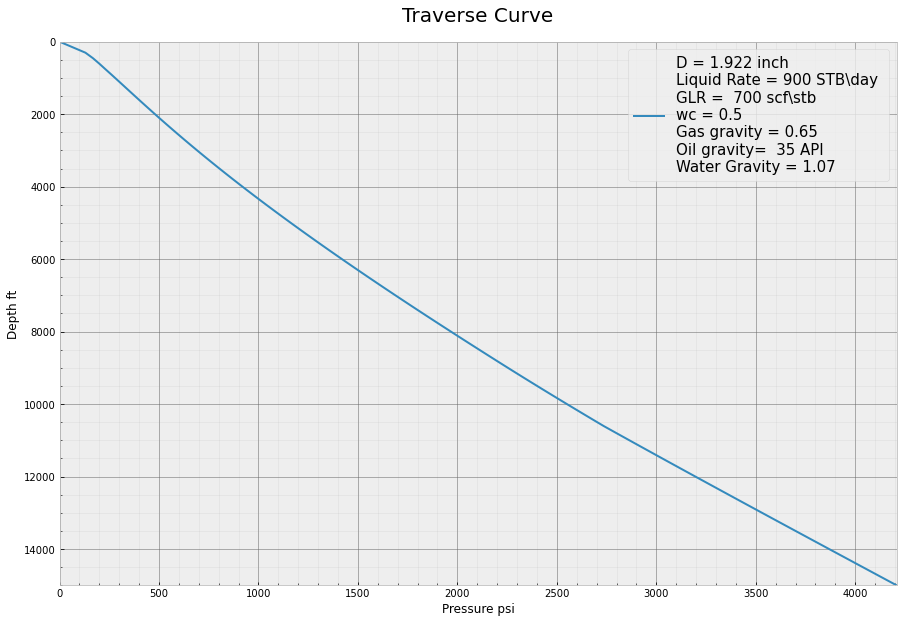

In [39]:
plt.figure(figsize=(15,10))
plt.plot(p, depths)
plt.xlabel('Pressure psi')
plt.ylabel('Depth ft')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.ylim(0,depths[-1])
plt.xlim(0,p[-1])

plt.gca().invert_yaxis()
plt.title("Traverse Curve", size=20,pad=20)
plt.legend([f'D = {diameter} inch \nLiquid Rate = {liquid_rate} STB\day \nGLR =  {GLR} scf\stb \nwc = {wc}\nGas gravity = {gas_grav} \nOil gravity=  {oil_grav} API\nWater Gravity = {wtr_grav}'],fontsize=15)
plt.show()

4391.0123019196435
3323.5806203398106
3318.7748428344994
3372.684688667097
3453.528556704286
3546.5811189317055
3647.4338314224897
3754.0862566298133
3889.6341328178096
4024.187872029822
4147.013895672238
4254.653288530273
4361.448349686772
4462.236915152021
4567.582907583177
4666.923521186884
4771.493350166546
4873.477003050723
4976.673185040694
5077.086504739171
5181.7396046430395
5285.59514452669
5391.042558999284
5497.903212263409
5604.416409173926
5714.661440417049
5823.383606674245
5935.564704237302
6047.726945194011
6163.8120078085485


C:\Users\abdo2\AppData\Local\Temp/ipykernel_10544/2821757750.py:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\abdo2\AppData\Local\Temp/ipykernel_10544/2821757750.py:16: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


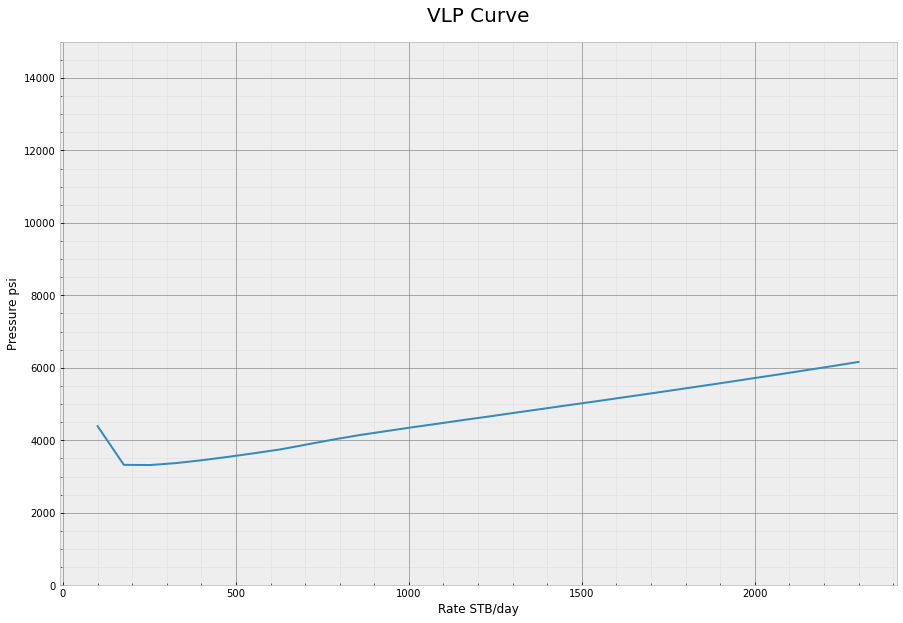

In [40]:
def vlp(rates):
    bhps =[]
    for q in rates:
        p = pressure_traverse(q)
        bhp = p[-1]
        print(bhp)
        bhps.append(bhp)
    return bhps

rates = np.linspace(100, 2300, 30)
bhps = vlp(rates)
plt.figure(figsize=(15,10))
plt.grid(b=True, which='major', color='#666666', linestyle='-')
# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.ylim(0,depths[-1])
plt.plot(rates, bhps, '-')
plt.xlabel('Rate STB/day')
plt.ylabel('Pressure psi')
plt.title("VLP Curve", size=20,pad=20)
plt.show()

In [43]:
liquid_rates=[180,1000,2000]


C:\Users\abdo2\AppData\Local\Temp/ipykernel_10544/3573428125.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\abdo2\AppData\Local\Temp/ipykernel_10544/3573428125.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


<Figure size 864x576 with 0 Axes>

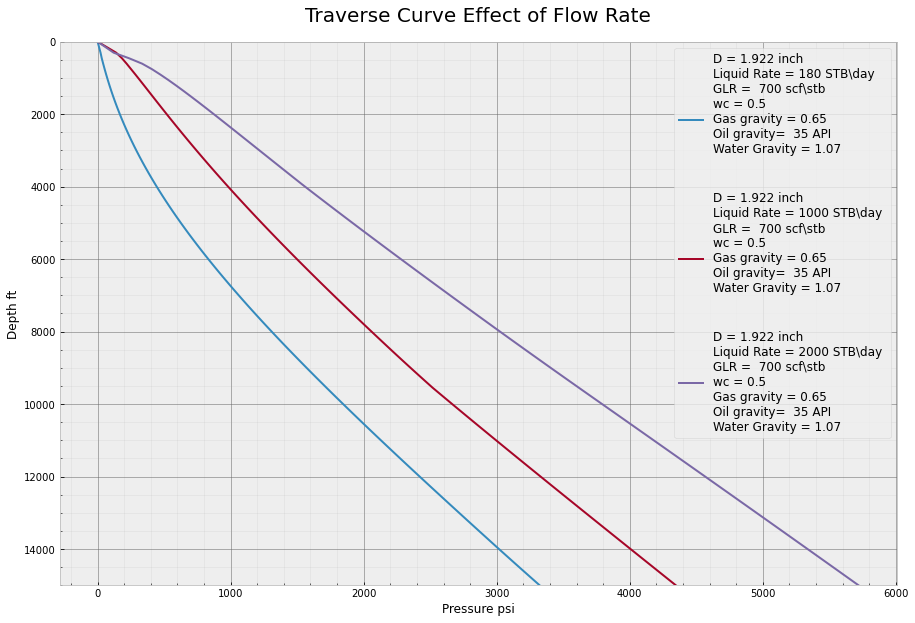

In [44]:
plt.style.use("bmh")
plt.figure(figsize=(12,8))
plt.figure(figsize=(15,10))
plt.xlabel('Pressure psi')
plt.ylabel('Depth ft')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.ylim(0,depths[-1])
plt.gca().invert_yaxis()
plt.title("Traverse Curve Effect of Flow Rate", size=20,pad=20)
for r in liquid_rates:
    p =pressure_traverse(r)
    plt.plot(p, depths)
plt.legend([f'D = {diameter} inch \nLiquid Rate = {liquid_rates[0]} STB\day \nGLR =  {GLR} scf\stb \nwc = {wc}\nGas gravity = {gas_grav} \nOil gravity=  {oil_grav} API\nWater Gravity = {wtr_grav}\n\n',f'D = {diameter} inch \nLiquid Rate = {liquid_rates[1]} STB\day \nGLR =  {GLR} scf\stb \nwc = {wc}\nGas gravity = {gas_grav} \nOil gravity=  {oil_grav} API\nWater Gravity = {wtr_grav}\n\n',
            f'D = {diameter} inch \nLiquid Rate = {liquid_rates[2]} STB\day \nGLR =  {GLR} scf\stb \nwc = {wc}\nGas gravity = {gas_grav} \nOil gravity=  {oil_grav} API\nWater Gravity = {wtr_grav}'
            ]
           ,fontsize=12)
plt.show()

In [46]:
GLRs=[100,500,1000]
liquid_rate=500


C:\Users\abdo2\AppData\Local\Temp/ipykernel_10544/1904148087.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='#666666', linestyle='-')
C:\Users\abdo2\AppData\Local\Temp/ipykernel_10544/1904148087.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


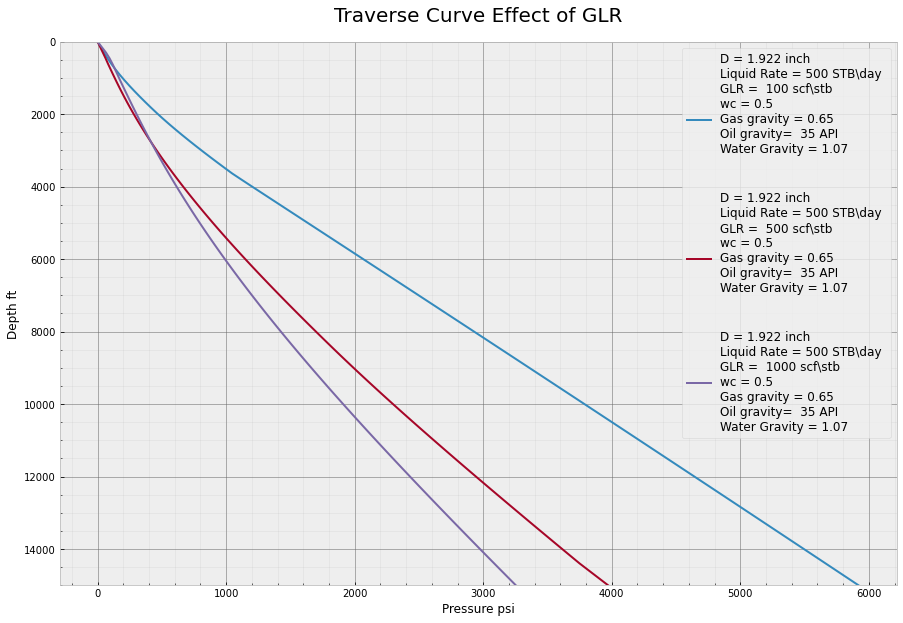

In [47]:
plt.figure(figsize=(15,10))
plt.xlabel('Pressure psi')
plt.ylabel('Depth ft')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.ylim(0,depths[-1])
plt.gca().invert_yaxis()
plt.title("Traverse Curve Effect of GLR", size=20,pad=20)
for glr in GLRs:
    p =pressure_traverse(liquid_rate,glr)
    plt.plot(p, depths)
plt.legend([f'D = {diameter} inch \nLiquid Rate = {liquid_rate} STB\day \nGLR =  {GLRs[0]} scf\stb \nwc = {wc}\nGas gravity = {gas_grav} \nOil gravity=  {oil_grav} API\nWater Gravity = {wtr_grav}\n\n',
            f'D = {diameter} inch \nLiquid Rate = {liquid_rate} STB\day \nGLR =  {GLRs[1]} scf\stb \nwc = {wc}\nGas gravity = {gas_grav} \nOil gravity=  {oil_grav} API\nWater Gravity = {wtr_grav}\n\n',
            f'D = {diameter} inch \nLiquid Rate = {liquid_rate} STB\day \nGLR =  {GLRs[2]} scf\stb \nwc = {wc}\nGas gravity = {gas_grav} \nOil gravity=  {oil_grav} API\nWater Gravity = {wtr_grav}'
            ]
           ,fontsize=12)
plt.show()